<a href="https://colab.research.google.com/github/bot5294/AL_ML_21_days_21_projects/blob/main/Day_16/Aqib_solution_of_16_Intelligent_Document_Automation_Building_a_Smart_OCR_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comprehension of Intelligent Document Processing

Intelligent Document Processing (IDP) is an advanced automation technology that transforms the way businesses handle documents. By leveraging artificial intelligence (AI), IDP systems can automatically read, understand, and process vast quantities of documents, extracting crucial data and feeding it into various business workflows. This technology is a significant leap from traditional Optical Character Recognition (OCR) as it not only digitizes text but also comprehends the context and structure of the information within documents.

At its core, IDP is designed to tackle the challenge of processing unstructured and semi-structured data, which make up a large portion of business documents such as invoices, contracts, emails, and forms. By automating the extraction and interpretation of this data, IDP significantly reduces the need for manual data entry, leading to increased efficiency, higher accuracy, and substantial cost savings.

<br><br>

---
<br><br>

### The Inner Workings of Intelligent Document Processing

The power of IDP lies in its sophisticated multi-step process that intelligently handles documents from ingestion to data delivery. This process typically involves several key stages:

**1. Document Ingestion:** The first step involves importing documents from various sources and in multiple formats, including scanned paper documents, PDFs, Word files, and images.

**2. Pre-processing:** To enhance the quality of the input, documents undergo a pre-processing stage. This includes techniques like noise reduction, image enhancement, and deskewing to improve the accuracy of subsequent data extraction.

**3. Document Classification:** Using machine learning algorithms, the IDP system automatically categorizes documents based on their layout and content. This allows the system to differentiate between an invoice, a purchase order, or a legal contract, for instance.

**4. Data Extraction:** This is the core function of IDP. Advanced AI technologies, including Natural Language Processing (NLP) and computer vision, are employed to identify and extract relevant data fields. For example, from an invoice, it can pull out the invoice number, date, vendor name, and line-item details.

**5. Data Validation:** The extracted data is then validated against predefined rules and existing databases to ensure accuracy and consistency. Any exceptions or discrepancies can be flagged for human review in a "human-in-the-loop" process, which also helps to train and improve the AI model over time.

**6. Integration:** Finally, the structured and validated data is seamlessly integrated into downstream business systems such as Enterprise Resource Planning (ERP), Customer Relationship Management (CRM), or other databases, making the information readily available for further processing and analysis.


From **finance departments** automating invoice processing and expense management to **healthcare organizations** streamlining patient record management and claims processing, IDP is proving to be a game-changer. Even  **human resources** can expedite resume screening and employee onboarding. As the technology continues to evolve, its applications are expected to expand even further, solidifying its role as a cornerstone of modern digital transformation.

# Our Approach

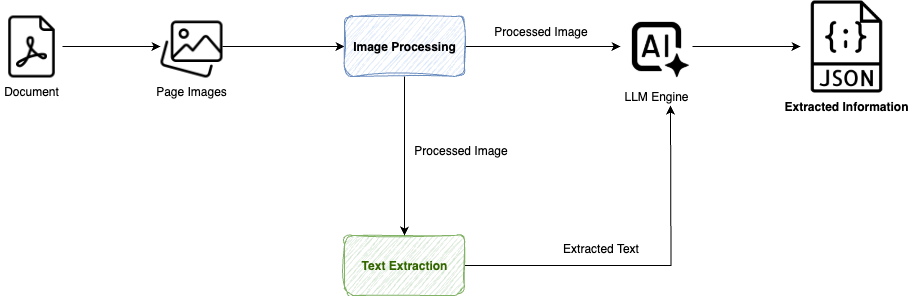

# SROIEv2: The Receipts Dataset

## Getting the data

In [1]:
!pip install --upgrade kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.13
    Uninstalling kagglehub-0.3.13:
      Successfully uninstalled kagglehub-0.3.13


In [2]:
import kagglehub

path = kagglehub.dataset_download("urbikn/sroie-datasetv2")

print("Path to dataset files:", path)

100%|██████████| 834M/834M [00:04<00:00, 193MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/urbikn/sroie-datasetv2/versions/4


In [3]:
! cat /kaggle/input/sroie-datasetv2/SROIE2019/test/entities/X00016469670.txt

cat: /kaggle/input/sroie-datasetv2/SROIE2019/test/entities/X00016469670.txt: No such file or directory


In [4]:
!cat /root/.cache/kagglehub/datasets/urbikn/sroie-datasetv2/versions/4/SROIE2019/test/entities/X00016469670.txt

{
    "company": "OJC MARKETING SDN BHD",
    "date": "15/01/2019",
    "address": "NO 2 & 4, JALAN BAYU 4, BANDAR SERI ALAM, B1750 MASAI, JOHOR",
    "total": "193.00"
}

Since these are single-paged images already, we don't need to convert them

## Understanding the data


The downloaded dataset contains two major folders:
1. **train**: This folder contains the training data.
2. **test**: This folder contains the test data.

Each of these folders contains the following subfolders:
1. **img**: This folder containing the images of the receipts.
2. **box**: This folder containing the bounding box information of the text in the images and the text inside the bounding boxes. The file is a text file with the same name as the image file but with a .txt extension. The format of the file is as follows:
    ```
    x1, y1, x2, y2, x3, y3, x4, y4, text
    ```
    where (x1, y1), (x2, y2), (x3, y3), and (x4, y4) are the coordinates of the bounding box and text is the text inside the bounding box.
3. **entities**: This folder contains the ground truth information of the entities in the receipts. The file is a text file with the same name as the image file but with a .txt extension. The file contains json data with the following format:
    ```json
    {
        "company": "COMPANY_NAME",
        "date": "DATE",
        "address": "ADDRESS",
        "total": "TOTAL",
    }
    ```

## Image Preprocesing: OpenCV

In [5]:
! pip install opencv-python matplotlib numpy

Let's take one image and play with it.

In [6]:
import os
one_image_path = os.path.join(path, 'SROIE2019', 'train', 'img', 'X51005453729.jpg')

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

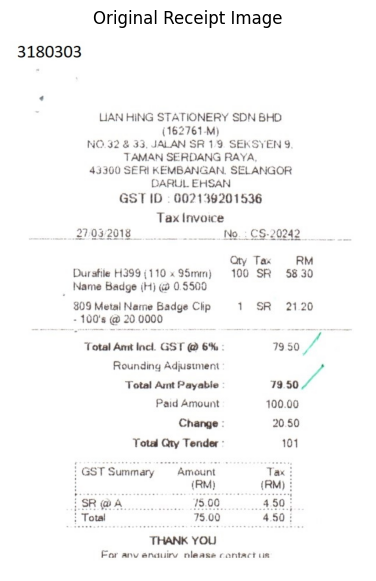

In [8]:
one_image = cv2.imread(one_image_path)
display_image(one_image, "Original Receipt Image")

### Grayscale Conversion

**Why?** Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.

In [9]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

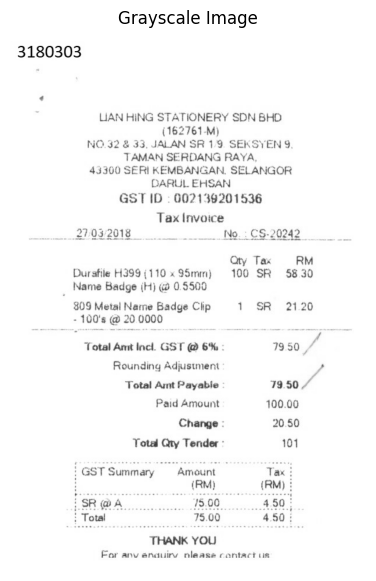

In [10]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

### Noise (blur) Reduction
**Why?** Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise. A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.

In [11]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

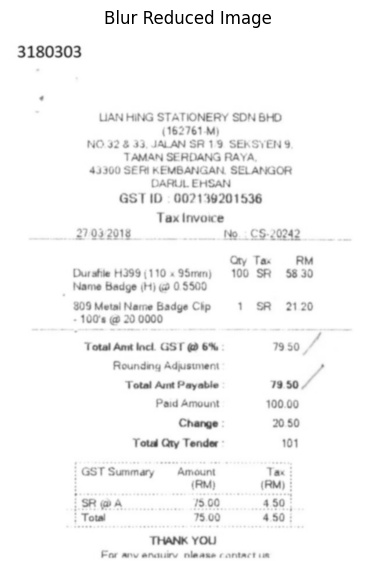

In [12]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

### Binarization (Thresholding)

**Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.

`cv2.adaptiveThreshold()`:

  * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Calculates the threshold for a pixel based on a weighted sum of neighborhood values.
  * `cv2.THRESH_BINARY_INV`: Inverts the result. We want the text to be white pixels (value 255) and the background black (value 0) for the next step (skew correction), which often works by finding white pixel contours.
  * `11`: The size of the neighborhood area (block size).
  * `4`: A constant subtracted from the mean. It's a fine-tuning parameter.

In [13]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, # Invert the colors (text becomes white because of matplotlib)
    11, # Block size
    4  # Constant C
  )

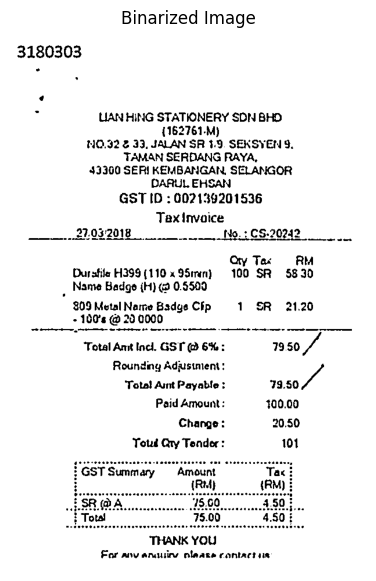

In [14]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

### Skew Correction

**Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.

A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.

In [15]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    # print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [16]:
deskewed_image = deskew_image(binarized_image)

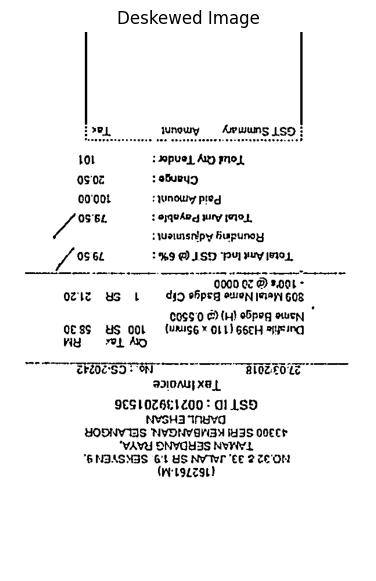

In [17]:
display_image(deskewed_image, "Deskewed Image")

Let's run the above code for all images

In [18]:
os.path.join(path, 'SROIE2019', 'train', 'img', 'X51007231344.jpg')

'/root/.cache/kagglehub/datasets/urbikn/sroie-datasetv2/versions/4/SROIE2019/train/img/X51007231344.jpg'

In [19]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  # print("Converted image to grayscale..")
  image = reduce_noise(image)
  # print("Reduced noise in the image..")
  image = binarize_image(image)
  # print("Binarized the image..")
  image = deskew_image(image)
  # print("Corrected image orientation..")
  return image

In [20]:
import time
from tqdm.auto import tqdm

output_folder_path = "/content/processed_images"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")


for image_name in tqdm(os.listdir(os.path.join(path, 'SROIE2019', 'train', 'img'))[:20]):

  # print(f"Processing image: {image_name}")
  image_path = os.path.join(path, 'SROIE2019', 'train', 'img', image_name)


  image = cv2.imread(image_path)

  processed_image = process_one_image(image)

  # save image
  output_path = os.path.join(output_folder_path, image_name)

  cv2.imwrite(output_path, processed_image)

  # print(f"Saved processed image to: {output_path}")
  # print("-"*50)

print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Processing images is completed.
Total time taken: 27.3526508808136 seconds


## Text Extraction: Tesseract

Tesseract OCR is a powerful and widely-used open-source optical character recognition (OCR) engine. In simple terms, it's a software that can "read" text from images and convert it into machine-readable text. This means you can take a picture of a document, a sign, or any other object containing text, and Tesseract can extract that text so you can edit, search, or analyze it.

### A Brief History and Development

Originally developed by Hewlett-Packard in the 1980s, Tesseract was later open-sourced in 2005 and has been sponsored by Google since 2006. This has led to significant improvements and made it one of the most accurate and versatile free OCR engines available. The latest versions of Tesseract utilize long short-term memory (LSTM), a type of recurrent neural network (RNN), which has greatly enhanced its ability to recognize text with high accuracy.



### Core Functionalities and Capabilities

Tesseract boasts a rich set of features that make it a flexible tool for various applications:

  * **Extensive Language Support:** Tesseract can recognize over 100 languages, making it a truly global OCR solution. It also supports multiple scripts and can even be trained to recognize new languages.
  * **Multiple Output Formats:** It can output the recognized text in various formats, including plain text, HTML, PDF, and TSV (tab-separated values). This allows for easy integration with other software and workflows.
  * **Page Segmentation Modes:** Tesseract offers different page segmentation modes, which help in correctly identifying the layout of a document, including columns, paragraphs, and blocks of text.
  * **Character Recognition and Confidence:** Not only does it recognize characters, but it can also provide a confidence score for each recognized character, word, or line. This is useful for assessing the accuracy of the OCR process.
  * **Command-Line and API Access:** Tesseract can be used as a command-line tool for quick and simple OCR tasks. For more complex integrations, it provides an API that allows developers to incorporate its OCR capabilities into their own applications. Popular wrappers like Pytesseract make it easy to use Tesseract with programming languages like Python.


### Installation
`pip install pytesseract pillow`


### How to Use Tesseract

For developers, integrating Tesseract into an application is straightforward using its API. Here is a simple example using the `pytesseract` wrapper in Python:

```python

from PIL import Image
import pytesseract


text = pytesseract.image_to_string(Image.open(filename))

print(text)
```



### Common Use Cases and Applications

The ability to extract text from images opens up a vast range of applications across various industries:

  * **Document Digitization:** Converting scanned documents, books, and historical archives into searchable digital text.
  * **Data Entry Automation:** Automating the process of entering data from invoices, receipts, and forms.
  * **Accessibility:** Assisting visually impaired individuals by converting printed text into speech.
  * **License Plate Recognition:** In law enforcement and traffic management systems.
  * **Social Media Monitoring:** Analyzing text within images shared on social media platforms.
  * **Translation:** Extracting text from an image and then using a translation service to translate it.

While Tesseract is a powerful tool, the accuracy of its output heavily depends on the quality of the input image. For best results, images should be clear, well-lit, and have a high resolution. Pre-processing steps like resizing, noise reduction, and converting to grayscale can significantly improve OCR accuracy.

In [21]:
! pip install pytesseract pillow

In [23]:
from PIL import Image
import pytesseract

print(pytesseract.image_to_string(Image.open('/content/processed_images/X00016469612.jpg')))

 

8 wo cor6
$513 ASL AVI SH NIGOL a
wy ha
- 1nnony - 2 301d
‘THE HSVO
SINE
Hd BELG BLOUTUSZ

NI

_ BUVOPOSLORESS

Ato

3920/3009

 

_ Moldattoar tot quun2g

|

 

|



In [24]:
from PIL import Image
import pytesseract
import time

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  text = pytesseract.image_to_string(Image.open(image_path))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
  with open(output_path, "w") as f:
    f.write(text)

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: X51007225398.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51007225398.txt
--------------------------------------------------
Processing image 2/20: X51006414636.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51006414636.txt
--------------------------------------------------
Processing image 3/20: X51005719862.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51005719862.txt
--------------------------------------------------
Processing image 4/20: X51005719904.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51005719904.txt
--------------------------------------------------
Processing image 5/20: X51007846269.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/X51007846269.txt
--------------------------------------------------
Processing image 6/20: X51005677335.jp

## Information Extraction

In [25]:
prompt = """
Extract the information from the given image.
Information to be extracted: company, date, address, total.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "company": "COMPANY_NAME",
    "date": "DATE",
    "address": "ADDRESS",
    "total": "TOTAL",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the text extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:


"""

Can we improve the prompt using the [Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)?

In [26]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [29]:
genai_client = genai.Client(api_key=userdata.get('gemini'))

In [30]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output"
output_folder_path = "/content/json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):

  print(f"Processing image {i}/{total_images}: {image_name}")

  image_path = os.path.join(input_folder_path, image_name)

  print(f"Loading image: {image_path}")
  with open(image_path, "rb") as f:
    image = Image.open(image_path)
    # print(image)


  text_path = os.path.join(text_folder_path, image_name.replace(".jpg", ".txt"))

  print(f"Loading extracted text: {text_path}")
  with open(text_path, "r") as f:
    text = f.read()

  print("Extracting information from image and text..")

  prompt = prompt + text



  contents = [
        image,
        {
            "text": prompt
        }
    ]
  response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)

  # Access the usage_metadata attribute

  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))

  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".json"))
  with open(output_path, "w") as f:
    json.dump(extracted_information, f, indent=4)

  print(f"Saved extracted information to {output_path}")
  print("-"*50)
  time.sleep(60)

print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: X51007225398.jpg
Loading image: /content/processed_images/X51007225398.jpg
Loading extracted text: /content/tesseract_output/X51007225398.txt
Extracting information from image and text..
Input Token Count: 654
Thoughts Token Count: 633
Output Token Count: 64
Total Token Count: 1351
Saved extracted information to /content/json_output/X51007225398.json
--------------------------------------------------
Processing image 2/20: X51006414636.jpg
Loading image: /content/processed_images/X51006414636.jpg
Loading extracted text: /content/tesseract_output/X51006414636.txt
Extracting information from image and text..
Input Token Count: 1320
Thoughts Token Count: 832
Output Token Count: 81
Total Token Count: 2233
Saved extracted information to /content/json_output/X51006414636.json
--------------------------------------------------


KeyboardInterrupt: 

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Can you play with a Resume Dataset?

https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset

# Aqib's Solution

In [34]:
!apt-get install -y poppler-utils tesseract-ocr
!pip install pdf2image pytesseract pillow opencv-python kaggle pandas matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 1s (206 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [37]:
import kagglehub

path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [38]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=d7b12dd15ee992cf1b03aa17c485344d0daa8220cbdb3e4851c0030b3a9cb7e6
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [41]:
import os

DATA_PATH = "/kaggle/input/resume-dataset"

for root, dirs, files in os.walk(DATA_PATH):
    for f in files[:10]:
        print(os.path.join(root, f))

/kaggle/input/resume-dataset/Resume/Resume.csv
/kaggle/input/resume-dataset/data/data/DESIGNER/22506245.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/13998435.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/67582956.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/34349255.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/26790545.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/12674307.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/11807040.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/44145704.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/27497542.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/11155153.pdf
/kaggle/input/resume-dataset/data/data/BPO/95625660.pdf
/kaggle/input/resume-dataset/data/data/BPO/15573418.pdf
/kaggle/input/resume-dataset/data/data/BPO/57706851.pdf
/kaggle/input/resume-dataset/data/data/BPO/16492045.pdf
/kaggle/input/resume-dataset/data/data/BPO/19362586.pdf
/kaggle/input/resume-dataset/data/data/BPO/63158213.pdf
/kaggle

In [43]:
!apt-get install -y poppler-utils tesseract-ocr
!pip install pdf2image pytesseract opencv-python pillow matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [44]:
PDF_PATH = "/kaggle/input/resume-dataset/data/data/ENGINEERING/21629057.pdf"

In [45]:
from pdf2image import convert_from_path
import os

os.makedirs("resume_pages", exist_ok=True)

pages = convert_from_path(PDF_PATH, dpi=300)

image_paths = []

for i, page in enumerate(pages):
    img_path = f"resume_pages/page_{i+1}.png"
    page.save(img_path, "PNG")
    image_paths.append(img_path)

print("Total Pages Converted:", len(image_paths))

Total Pages Converted: 2


(np.float64(-0.5), np.float64(2479.5), np.float64(3508.5), np.float64(-0.5))

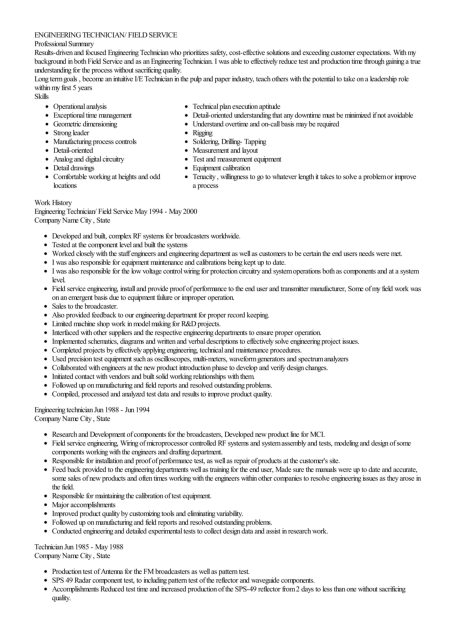

In [46]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_paths[0])
plt.figure(figsize=(6,8))
plt.imshow(img)
plt.axis("off")


In [47]:
import pytesseract
import cv2

def extract_text(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

full_text = ""

for img_path in image_paths:
    full_text += extract_text(img_path)

print(full_text[:2000])   # preview first part


ENGINEERING TECHNICIAN/ FIELD SERVICE

Professional Summary

Results-driven and focused Engineering Technician who prioritizes safety, cost-effective solutions and exceeding customer expectations. With my
background in both Field Service and as an Engineering Technician. I was able to effectively reduce test and production time through gaining a true
understanding for the process without sacrificing quality.

Long term goals , become an intuitive I/E Technician in the pulp and paper industry, teach others with the potential to take on a leadership role

within my first 5 years
Skills
e Operational analysis e Technical plan execution aptitude
e Exceptional time management e Detail-oriented understanding that any downtime must be mmimized if not avoidable
e Geometric dimensioning e Understand overtime and on-call basis may be required
e Strong leader e Rigging
e Manufacturing process controls e Soldermng, Driling- Tapping
e Detail-oriented e Measurement and layout
e Analog and digital ci

In [48]:
import re

def clean_text(text):
    return re.sub(r"\s+", " ", text).strip()

cleaned_text = clean_text(full_text)
print(cleaned_text[:1000])


ENGINEERING TECHNICIAN/ FIELD SERVICE Professional Summary Results-driven and focused Engineering Technician who prioritizes safety, cost-effective solutions and exceeding customer expectations. With my background in both Field Service and as an Engineering Technician. I was able to effectively reduce test and production time through gaining a true understanding for the process without sacrificing quality. Long term goals , become an intuitive I/E Technician in the pulp and paper industry, teach others with the potential to take on a leadership role within my first 5 years Skills e Operational analysis e Technical plan execution aptitude e Exceptional time management e Detail-oriented understanding that any downtime must be mmimized if not avoidable e Geometric dimensioning e Understand overtime and on-call basis may be required e Strong leader e Rigging e Manufacturing process controls e Soldermng, Driling- Tapping e Detail-oriented e Measurement and layout e Analog and digital circui

In [49]:
emails = re.findall(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", cleaned_text)
phones = re.findall(r"(\+?\d[\d -]{8,13}\d)", cleaned_text)
possible_name = " ".join(cleaned_text.split()[:6])
result = {
    "Name": possible_name,
    "Email": emails,
    "Phone": phones,
    "Extracted_Text_Preview": cleaned_text[:500]
}

result


{'Name': 'ENGINEERING TECHNICIAN/ FIELD SERVICE Professional Summary',
 'Email': [],
 'Phone': [],
 'Extracted_Text_Preview': 'ENGINEERING TECHNICIAN/ FIELD SERVICE Professional Summary Results-driven and focused Engineering Technician who prioritizes safety, cost-effective solutions and exceeding customer expectations. With my background in both Field Service and as an Engineering Technician. I was able to effectively reduce test and production time through gaining a true understanding for the process without sacrificing quality. Long term goals , become an intuitive I/E Technician in the pulp and paper industry, teach'}